## QSAR Aquatic Toxicity Prediction Using (Keras) Feed Forward Neural Network

In [373]:
#importing libraries
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow import keras
from tensorflow.keras import layers

print("Tensor Flow Version Used : ", tf.__version__)

Tensor Flow Version Used :  2.1.0


### Data Set Description

This dataset is used to solve a function approximation regression problem using keras feed forward neural network
models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals, to predict acute aquatic toxicity towards Daphnia Magna. LC50 data, which is the concentration that causes death in 50% of test D. magna over a test duration of 48 hours, was used as model response. The model comprised 8 molecular descriptors: TPSA(Tot) (Molecular properties) , SAacc (Molecular properties), H-050 (Atom-centred fragments), MLOGP (Molecular properties),
RDCHI (Connectivity indices), GATS1p (2D autocorrelations), nN (Constitutional indices), C-040 (Atom-centred fragments).

#### Data set containing values for 8 attributes (molecular descriptors) of 546 chemicals used to predict quantitative acute aquatic toxicity towards the fish "Daphnia Magna"

 #### The target variable Y is "LC50" which is concerntration of toxicity that causes the death of fish(fathead minnow)

In [374]:
toxic_data = pd.read_csv (r'QSAR.csv')

In [375]:
#the data set consists of 908 observations for 6 attributes namely "CIC0, SM1_Dz, GATS1i, NdsCH, NdssC, MLOGP" and 1 dependent vairable Y "Y_LC50"

toxic_data.shape

(908, 7)

In [376]:
# Toxicity value ranges from 0.053 to 9.61
#The below tables gives the statstics of all the other variables

toxic_data.describe()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,Y_LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


### Data Preprocessing and Exploratory data analysis

In [377]:
#checking number of NA values in the dataset

toxic_data.isna().sum()

CIC0      0
SM1_Dz    0
GATS1i    0
NdsCH     0
NdssC     0
MLOGP     0
Y_LC50    0
dtype: int64

In [378]:
#splitting dataset into train and test with split ration 70% and 30% respectively by random split

train_dataset = toxic_data.sample(frac=0.7,random_state=0)
test_dataset = toxic_data.drop(train_dataset.index)

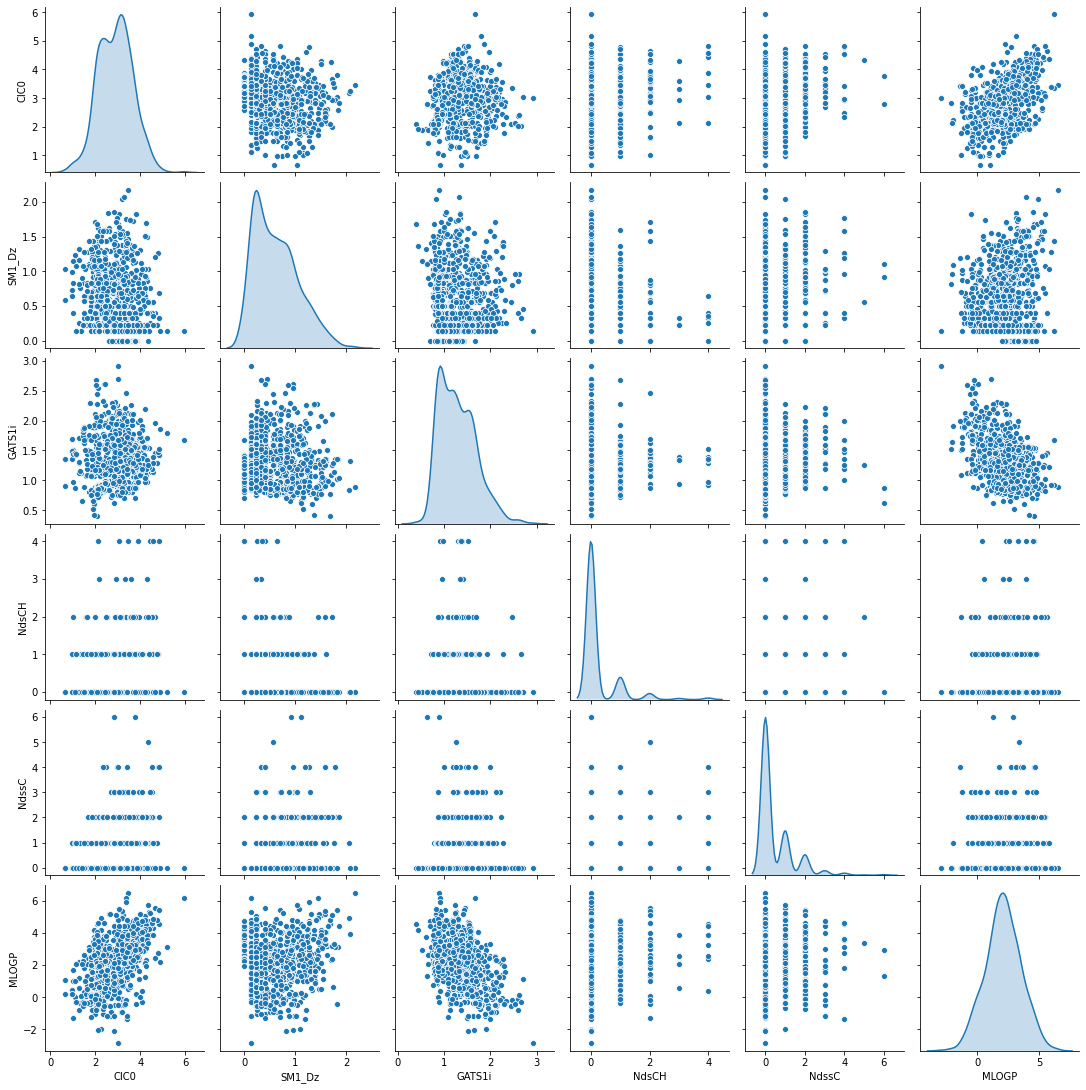

In [379]:
# lets look at the distribution of features in our dataset

sns.pairplot(toxic_data[["CIC0", "SM1_Dz", "GATS1i", "NdsCH", "NdssC", "MLOGP"]], diag_kind="kde")


In [380]:
train_des = toxic_data.describe()
train_des.pop("Y_LC50")
train_des = train_des.transpose()
train_des

,count,mean,std,min,25%,50%,75%,max
CIC0,908.0,2.898129,0.756088,0.667,2.34700,2.9340,3.40700,5.926
SM1_Dz,908.0,0.628468,0.428459,0.000,0.22300,0.5700,0.89275,2.171
GATS1i,908.0,1.293591,0.394303,0.396,0.95075,1.2405,1.56225,2.920
NdsCH,908.0,0.229075,0.605335,0.000,0.00000,0.0000,0.00000,4.000
NdssC,908.0,0.485683,0.861279,0.000,0.00000,0.0000,1.00000,6.000
MLOGP,908.0,2.109285,1.433181,-2.884,1.20900,2.1270,3.10500,6.515


In [381]:
# extracting label values/Y variable "Y_LC50" i.e. acute aquatic toxicity

train_labels = train_dataset.pop('Y_LC50')
test_labels = test_dataset.pop('Y_LC50')



In [382]:
# Normalizing independent variables ( neural network performs better with normalized data )

def norm(x):
    return (x - train_des['mean']) / train_des['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [383]:
#checking input shape of the model wrt to the independent variables

len(train_dataset.keys())

6

### Building the feed forward neural network

In [384]:
# creating the feed forward neural network d-2d-1 with "sigmoid" activation and metrics as "mean squared error"
#to look into the model learning with every weight updates after back propagation

def create_model():
  model = keras.Sequential([
    layers.Dense(12, activation='sigmoid', input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])


  model.compile(loss='mse',
                optimizer="SGD",
                metrics=['mse'])
  return model

In [385]:
#Looking at the neural network model features (shapes and parameters)

ff_model = create_model()
ff_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [387]:
normed_train_data.shape

(636, 6)

### Model Training

In [388]:
#training the model with 300 epochs and 636 batch size
#We test the performance of our test data in validation 

EPOCHS = 300

history = ff_model.fit(
  normed_X, df_labels,
  epochs=EPOCHS, validation_data = (normed_test_data,test_labels), verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()], batch_size=636)


Epoch: 0, loss:26.8618,  mse:26.8618,  val_loss:21.2373,  val_mse:21.2373,  
....................................................................................................
Epoch: 100, loss:0.9834,  mse:0.9834,  val_loss:0.9991,  val_mse:0.9991,  
....................................................................................................
Epoch: 200, loss:0.8746,  mse:0.8746,  val_loss:0.8859,  val_mse:0.8859,  
....................................................................................................

In [389]:
#looking at the improvement in MSE (learning) at the end of our training

hist_info = pd.DataFrame(history.history)
hist_info['epoch'] = history.epoch
hist_info.tail()

,loss,mse,val_loss,val_mse,epoch
295,0.865092,0.865092,0.876690,0.876690,295
296,0.864921,0.864922,0.876710,0.876710,296
297,0.864882,0.864882,0.876887,0.876887,297
298,0.864885,0.864885,0.876602,0.876602,298
299,0.864879,0.864879,0.876923,0.876923,299


In [390]:
# Looking at the weights of the learned parameters for our network

ff_model.weights

[<tf.Variable 'dense_54/kernel:0' shape=(6, 12) dtype=float32, numpy=
 array([[-0.47887775, -0.45191154,  0.38952634,  0.05462907,  0.2940244 ,
          0.5976113 , -0.49730575,  0.39932415,  0.06038319, -0.52962744,
          0.31887892, -0.15851898],
        [-0.22924554, -0.28423476, -0.5456425 ,  0.36333385,  0.6658226 ,
          0.18601257, -0.34210527,  0.00846124,  0.20785838, -0.516775  ,
          0.19320677,  0.46366078],
        [ 0.36812368, -0.34596097,  0.45833597, -0.3997954 , -0.2948192 ,
          0.24383907, -0.46387365, -0.24468   , -0.14775966, -0.4088516 ,
         -0.37730068,  0.04496676],
        [-0.22869433, -0.21832289,  0.10169823,  0.26533076,  0.6659546 ,
          0.50158626,  0.0160137 , -0.30282286, -0.05808705,  0.19667692,
         -0.42807147,  0.09327389],
        [ 0.04175361, -0.48542133, -0.31018665,  0.2433216 , -0.04157013,
          0.16972493,  0.26208183, -0.4405311 ,  0.02727818,  0.0594651 ,
         -0.470651  ,  0.22962938],
        [-

In [391]:
history_plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

### Result (Performance on MSE vs Epochs(weight updates))

Text(0, 0.5, 'MSE [Aquatic Toxicity]')

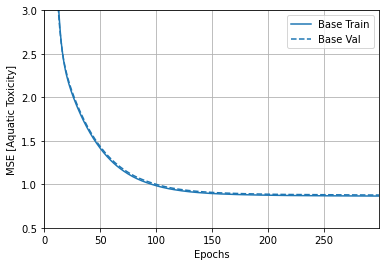

In [392]:
#Results: MSE on the y-axis, Number of weight updates on the x-axis(epochs)

history_plotter.plot({'Base': history}, metric = "mse")
plt.ylim([0.5, 3])
plt.ylabel('MSE [Aquatic Toxicity]')

We can see that with the epochs the model learns the updated parameters and results in reduced mean square error with each epoch iteration

### Regression function approximation performance using neural network model on test data

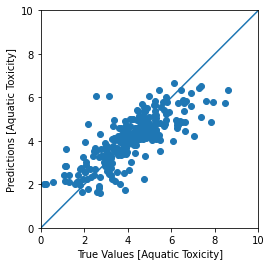

In [393]:
#Plotting prediction vs actual values of toxicity

test_predictions = ff_model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Aquatic Toxicity]')
plt.ylabel('Predictions [Aquatic Toxicity]')
scale = [0, 10]
plt.xlim(scale)
plt.ylim(scale)
_ = plt.plot(scale, scale)

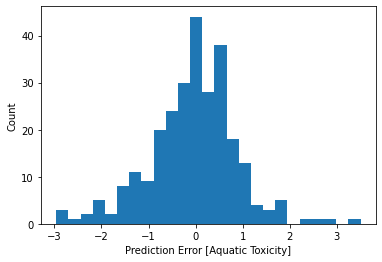

In [395]:
#Prediction Error Distribution for future improvements on error standard deviation

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Aquatic Toxicity]")
_ = plt.ylabel("Count")

### Conclusion

From the result section it is concluded that as the weights update after every epoch the models training and validation error (mse) decreases. This states that the model learns its parameters and solves the function approximation problem in this case

### References

Dataset : https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

Tensorflow : https://www.tensorflow.org/api_docs


Keras : https://keras.io/api/models/sequential/